# Sentiment Analysis

Install textblob package

In [ ]:
pip install textblob
/opt/homebrew/opt/python@3.9/bin/python3.9 -m textblob.download_corpora

## Sentiment Analysis

In [37]:
import pandas as pd

data = pd.read_csv('programming_task_dataset.csv')

   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

In [2]:
# Create lambda functions to find the polarity and subjectivity of each routine
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,textID,text,polarity,subjectivity
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0.0000,0.066667
1,96d74cb729,Shanghai is also really exciting (precisely -...,0.1625,0.800000
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0.0000,0.500000
3,01082688c6,happy bday!,1.0000,1.000000
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,0.0000,0.000000
...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",-0.5200,0.910000
3530,416863ce47,All alone in this old house again. Thanks for...,0.0850,0.160000
3531,6332da480c,I know what you mean. My little dog is sinkin...,-0.1000,0.429167
3532,df1baec676,_sutra what is your next youtube video gonna b...,0.3125,0.300000


In [3]:
# categorize sentiment based on polarity score
def assignLabels(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['polarity_tag'] = data['polarity'].apply(assignLabels)
data

,textID,text,polarity,subjectivity,polarity_tag
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0.0000,0.066667,Neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,0.1625,0.800000,Positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0.0000,0.500000,Neutral
3,01082688c6,happy bday!,1.0000,1.000000,Positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,0.0000,0.000000,Neutral
...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",-0.5200,0.910000,Negative
3530,416863ce47,All alone in this old house again. Thanks for...,0.0850,0.160000,Positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,-0.1000,0.429167,Negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,0.3125,0.300000,Positive


## Barplot

In [35]:
# calculate the percentage of each sentiment category
pol_perc = data.groupby(['polarity_tag']).size()/len(data['polarity_tag'])*100
pol_perc = pol_perc.to_dict()
pol_perc

{'Negative': 20.203735144312393,
 'Neutral': 35.483870967741936,
 'Positive': 44.312393887945674}

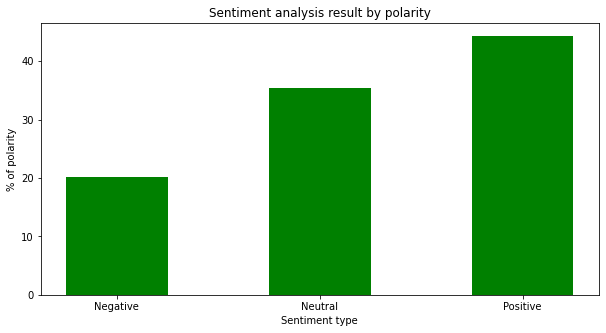

In [5]:
import matplotlib.pyplot as plt

Sentiment_type = list(pol_perc.keys())
Perc = list(pol_perc.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(Sentiment_type, Perc, color ='green',
        width = 0.5)
plt.xlabel("Sentiment type")
plt.ylabel("% of polarity")
plt.title("Sentiment analysis result by polarity")

plt.show()

## Word Cloud

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from textblob import TextBlob

# Create wordlist for each post
def wordProcess(x):
    outputList = []
    wordlist = TextBlob(x).words.lower()
    for i in wordlist:
        if len(i) > 1: # remove single alphabets
            if i not in STOPWORDS: # remove stop words
                outputList.append(i)
    sudo_sentence = ''
    for j in outputList:
        sudo_sentence = sudo_sentence + ' ' + j
    return sudo_sentence

data['wordlist'] = data['text'].apply(wordProcess)
data

,textID,text,polarity,subjectivity,polarity_tag,wordlist
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0.0000,0.066667,Neutral,last session day twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,0.1625,0.800000,Positive,shanghai really exciting precisely skyscraper...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0.0000,0.500000,Neutral,recession hit veronique branquinho quit compa...
3,01082688c6,happy bday!,1.0000,1.000000,Positive,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,0.0000,0.000000,Neutral,twitpic.com/4w75p
...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",-0.5200,0.910000,Negative,im tired sleep try
3530,416863ce47,All alone in this old house again. Thanks for...,0.0850,0.160000,Positive,alone old house thanks net keeps alive kickin...
3531,6332da480c,I know what you mean. My little dog is sinkin...,-0.1000,0.429167,Negative,know mean little dog sinking depression wants...
3532,df1baec676,_sutra what is your next youtube video gonna b...,0.3125,0.300000,Positive,sutra next youtube video gon na love videos


In [36]:
#Creating the text variable
text2 = " ".join(text for text in data.wordlist)
#TextBlob(text2).correct() # correct spelling

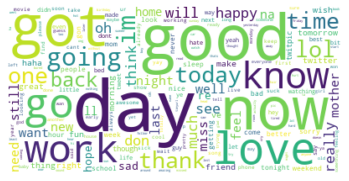

In [34]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()